In [1]:
using RCall
macro sym_str(x) :(Symbol($(esc(x)))) end
@rimport binom as binom
@rimport exactci as exactci

In [2]:
using Distributions
using StatsPlots
using Roots
x ⪅ y = x < y || x ≈ y

pval_exact(dist, k) = sum(pdf(dist, j) for j in support(dist) if pdf(dist, j) ⪅ pdf(dist, k))
pval_exact(n, p, k) = pval_exact(Binomial(n, p), k)
pval_2x1sd(dist, k) = min(1, 2cdf(dist, k), 2ccdf(dist, k - 1))
pval_2x1sd(n, p, k) = pval_2x1sd(Binomial(n, p), k)
chisq_stat(n, p, k) = (k - n*p)^2/(n*p*(1 - p))
pval_chisq(n, p, k) = ccdf(Chisq(1), chisq_stat(n, p, k))
ci(pval, n, k, α=0.05) = find_zeros(p -> pval(n, p, k) - α, 0, 1)

ci (generic function with 2 methods)

In [3]:
n, k = 20, 3

(20, 3)

In [4]:
binom.binom_confint(k, n)

RObject{VecSxp}
          method x  n      mean        lower     upper
1  agresti-coull 3 20 0.1500000  0.043939011 0.3688486
2     asymptotic 3 20 0.1500000 -0.006490575 0.3064906
3          bayes 3 20 0.1666667  0.030190567 0.3226836
4        cloglog 3 20 0.1500000  0.037330792 0.3346644
5          exact 3 20 0.1500000  0.032070937 0.3789268
6          logit 3 20 0.1500000  0.049173436 0.3758445
7         probit 3 20 0.1500000  0.043854422 0.3574596
8        profile 3 20 0.1500000  0.039794886 0.3443830
9            lrt 3 20 0.1500000  0.039555944 0.3443762
10     prop.test 3 20 0.1500000  0.039566272 0.3886251
11        wilson 3 20 0.1500000  0.052368746 0.3604189


In [5]:
@show exactci.binom_exact(k, n, tsmethod = "central")[sym"conf.int"][1:2]
@show exactci.binom_exact(k, n, tsmethod = "minlik")[sym"conf.int"][1:2]
@show exactci.binom_exact(k, n, tsmethod = "blaker")[sym"conf.int"][1:2];

((exactci.binom_exact(k, n, tsmethod = "central"))[sym"conf.int"])[1:2] = [0.03207093718546373, 0.37892682654531396]
((exactci.binom_exact(k, n, tsmethod = "minlik"))[sym"conf.int"])[1:2] = [0.0422, 0.3722]
((exactci.binom_exact(k, n, tsmethod = "blaker"))[sym"conf.int"])[1:2] = [0.0422, 0.3694]


In [6]:
@show ci(pval_exact, n, k)
@show ci(pval_2x1sd, n, k)
@show ci(pval_chisq, n, k);

ci(pval_exact, n, k) = [0.04216940788577858, 0.3722025234982261]
ci(pval_2x1sd, n, k) = [0.0320709371854637, 0.37892682654531396]
ci(pval_chisq, n, k) = [0.052368745896216616, 0.36041886474075685]


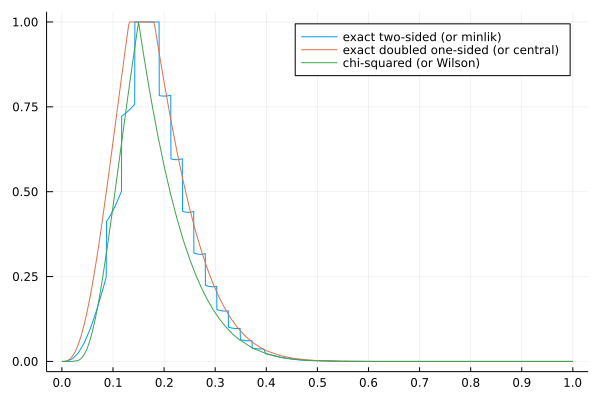

In [7]:
n, k = 20, 3
plot(; xtick=0:0.1:1)
plot!(p -> pval_exact(n, p, k), 0, 1; label="exact two-sided (or minlik)")
plot!(p -> pval_2x1sd(n, p, k), 0, 1; label="exact doubled one-sided (or central)")
plot!(p -> pval_chisq(n, p, k), 0, 1; label="chi-squared (or Wilson)")